# knn algoritması
* import dataset
* dataset tanımı
* dataset görselleştirme
* knn algoritması ve ne demek açıkla
* knn with sklearn
* ödev


In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [159]:
data = pd.read_csv("data.csv")

In [160]:
data.drop(["id","Unnamed: 32"],axis=1,inplace=True)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [161]:
M = data[data.diagnosis=="M"]
B = data[data.diagnosis=="B"]

# conclusion

In [162]:
B.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 19 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                357 non-null    object 
 1   radius_mean              357 non-null    float64
 2   texture_mean             357 non-null    float64
 3   perimeter_mean           357 non-null    float64
 4   area_mean                357 non-null    float64
 5   smoothness_mean          357 non-null    float64
 6   compactness_mean         357 non-null    float64
 7   concavity_mean           357 non-null    float64
 8   concave points_mean      357 non-null    float64
 9   symmetry_mean            357 non-null    float64
 10  fractal_dimension_mean   357 non-null    float64
 11  radius_se                357 non-null    float64
 12  texture_se               357 non-null    float64
 13  perimeter_se             357 non-null    float64
 14  area_se                  

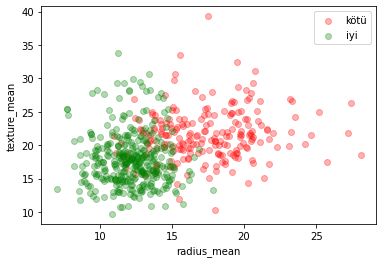

In [163]:
plt.scatter(M.radius_mean,M.texture_mean, color="red",label="kötü",alpha=0.3)
plt.scatter(B.radius_mean,B.texture_mean, color="green",label="iyi",alpha=0.3)
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.legend()
plt.show()

In [164]:
data.diagnosis = [1 if each =='M' else 0 for each in data.diagnosis]
y = data.diagnosis.values
x_data = data.drop(["diagnosis"],axis=1)

In [165]:
# normalization
x = (x_data-np.min(x_data)) / (np.max(x_data)-np.min(x_data))

In [166]:
# train and test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)


In [167]:
# knn model
from sklearn.neighbors import KNeighborsClassifier # çünkü classification yapıyoruz
knn = KNeighborsClassifier(n_neighbors=3) #key değeri yani seçilen ref noktasına en yakın 3 tane örnek alıp bakılacak
# bakılanların hangi sınıftan olduğuna göre o nokta 0 veya 1 sınıfı olarak işaretlenecek.
knn.fit(x_train,y_train) #eğitip modelimi oluşturuyorum
prediction = knn.predict(x_test)

In [168]:
prediction

array([0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1], dtype=int64)

In [169]:
print("{} knn score: {}".format(100,knn.score(x_test,y_test))) # uygun key değeri deneyerek bulunur

100 knn score: 0.9590643274853801


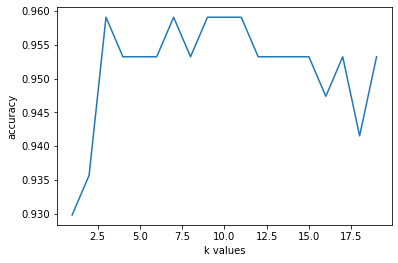

In [172]:
#find best k value
score_list=[]
for each in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train,y_train) #eğitip modelimi oluşturuyorum
    score_list.append(knn2.score(x_test,y_test))
plt.plot(range(1,20), score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()